In [1]:
import numpy as np
import pandas as pd

In [2]:
dict1={
     'day' : ['1/1/2017', '1/2/2017', '1/3/2017', '1/4/2017', '1/5/2017', '1/6/2017'],
    'temperature' : [32, 35, 28, 24, 32, 32],
    'windspeed' : [6, 7, 2, 7, 4, 2],
    'event' : ['Rain', 'Sunny', 'Snow', 'Snow', 'Rain', 'Sunny']

}
df = pd.DataFrame(dict1)
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,32,2,Sunny


### view data

In [3]:
df.shape

(6, 4)

In [4]:
df.head()

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain


In [5]:
df.tail()

,day,temperature,windspeed,event
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,32,2,Sunny


In [6]:
df.columns

Index(['day', 'temperature', 'windspeed', 'event'], dtype='object')

In [7]:
df.day #individual column

0    1/1/2017
1    1/2/2017
2    1/3/2017
3    1/4/2017
4    1/5/2017
5    1/6/2017
Name: day, dtype: object

In [8]:
df[['day','event']]

,day,event
0,1/1/2017,Rain
1,1/2/2017,Sunny
2,1/3/2017,Snow
3,1/4/2017,Snow
4,1/5/2017,Rain
5,1/6/2017,Sunny


### operations on data

In [9]:
df['temperature'].max(),df['temperature'].min()

(35, 24)

In [10]:
df.describe()

,temperature,windspeed
count,6.000000,6.000000
mean,30.500000,4.666667
std,3.885872,2.338090
min,24.000000,2.000000
25%,29.000000,2.500000
50%,32.000000,5.000000
75%,32.000000,6.750000
max,35.000000,7.000000


In [11]:
df[df.temperature>=32] #conditional select

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
4,1/5/2017,32,4,Rain
5,1/6/2017,32,2,Sunny


In [12]:
df.set_index('day')

,temperature,windspeed,event
day,,,
1/1/2017,32,6,Rain
1/2/2017,35,7,Sunny
1/3/2017,28,2,Snow
1/4/2017,24,7,Snow
1/5/2017,32,4,Rain
1/6/2017,32,2,Sunny


In [13]:
df[['day','event']][df['temperature']==df['temperature'].min()]

,day,event
3,1/4/2017,Snow


### reading from csv

In [14]:
df = pd.read_csv("stock_data.csv",header=None)
df

,0,1,2,3,4
0,Starting,NaN,NaN,NaN,NaN
1,tickers,eps,revenue,price,people
2,GOOGL,27.82,87,845,larry page
3,WMT,4.61,484,65,n.a.
4,MSFT,-1,85,64,bill gates
5,RIL,not available,50,1023,mukesh ambani
6,TATA,5.6,-1,n.a.,ratan tata


In [15]:
df = pd.read_csv("stock_data.csv", header= 1, nrows=3)
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1.00,85,64,bill gates


In [16]:
df = pd.read_csv("stock_data.csv",header=1, na_values=["not available",'n.a.'])
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845.0,larry page
1,WMT,4.61,484,65.0,NaN
2,MSFT,-1.00,85,64.0,bill gates
3,RIL,NaN,50,1023.0,mukesh ambani
4,TATA,5.60,-1,NaN,ratan tata


In [17]:
# since revenue can't be -1, we need to convert it to NaN, 
# but converting -1 to NaN cause the correct -1 value of eps to change as well.
# therefore,using dictionary 

In [18]:
df=pd.read_csv("stock_data.csv", header=1,na_values ={
               'eps':['not available','n.a.'],
               'revenue':['not avaiilable','n.a.',-1],
                'price': ["not available",'n.a.'], 
               'people': ["not available",'n.a.']   
           })
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,845.0,larry page
1,WMT,4.61,484.0,65.0,NaN
2,MSFT,-1.00,85.0,64.0,bill gates
3,RIL,NaN,50.0,1023.0,mukesh ambani
4,TATA,5.60,NaN,NaN,ratan tata


### writing back to csv

In [19]:
df.to_csv('new.csv',index = False)

In [20]:
df.columns

Index(['tickers', 'eps', 'revenue', 'price', 'people'], dtype='object')

In [21]:
# df.to_csv("new.csv",columns=['tickers','eps'])

In [22]:
df.to_csv("new_csv",header=False)

### reading an excel file

In [23]:
df = pd.read_excel("stock_data.xlsx")
df

,Starting,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani
5,TATA,5.6,-1,n.a.,ratan tata


### converting na values

In [24]:
def convert_people_cell(cell):
    if cell == 'n.a.':
        return 'sam walton'
    return cell
def covert_eps_cell(cell):
    if cell == 'not available':
        return None
    return cell

In [25]:
df = pd.read_excel("stock_data.xlsx",header=1,converters ={ 'eps': covert_eps_cell, 'people' : convert_people_cell})
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,sam walton
2,MSFT,-1.00,85,64,bill gates
3,RIL,NaN,50,1023,mukesh ambani
4,TATA,5.60,-1,n.a.,ratan tata


### writing to excel file 

In [26]:
df.to_excel("new_excel.xlsx", sheet_name="stocks")

### handling missing data

In [50]:
dict1={
     'day' : ['1/1/2017', '1/2/2017', '1/3/2017', '1/4/2017', '1/5/2017', '1/6/2017'],
    'temperature' : [32, 35, np.nan, 24, 19, 32],
    'windspeed' : [6, 7, 2, 7, 4, np.nan],
    'event' : ['Rain', np.nan, np.nan, np.nan, 'Snow', 'Sunny']

}
df = pd.DataFrame(dict1)
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,35.0,7.0,NaN
2,1/3/2017,NaN,2.0,NaN
3,1/4/2017,24.0,7.0,NaN
4,1/5/2017,19.0,4.0,Snow
5,1/6/2017,32.0,NaN,Sunny


In [51]:
"""
new_df = df.fillna({
    'temperature':0,
    'windspeed':0,
    'event':'no event'
})

new_df
"""

"\nnew_df = df.fillna({\n    'temperature':0,\n    'windspeed':0,\n    'event':'no event'\n})\n\nnew_df\n"

In [52]:
# sometimes,fillna is not a good option to replace fillna to zero,
# we sometimes want to just carry forward the previous opeartion with Nan entry
#anf for this we use   ffill method.

In [53]:
new_df = df.fillna(method = "ffill")

In [54]:
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,35.0,7.0,Rain
2,1/3/2017,35.0,2.0,Rain
3,1/4/2017,24.0,7.0,Rain
4,1/5/2017,19.0,4.0,Snow
5,1/6/2017,32.0,4.0,Sunny


In [55]:
# we can also use backwardfill "bfill" which copies values next to NaN

In [58]:
new_df = df.fillna(method='bfill',axis='rows')
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,35.0,7.0,Snow
2,1/3/2017,24.0,2.0,Snow
3,1/4/2017,24.0,7.0,Snow
4,1/5/2017,19.0,4.0,Snow
5,1/6/2017,32.0,NaN,Sunny


In [59]:
# to limit the bfill or fill by a certain value, so that not all missing values are changed but limited, we use "limit"
# new_df = df.fillna(method="ffill",limit=1)

##### using interpolate 

In [62]:
new_df = df.interpolate() #default: mean of value above and value below 
new_df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,35.0,7.0,NaN
2,1/3/2017,29.5,2.0,NaN
3,1/4/2017,24.0,7.0,NaN
4,1/5/2017,19.0,4.0,Snow
5,1/6/2017,32.0,4.0,Sunny


In [63]:
# we can also drop the missing values using dropna()
# another method: dropna(thresh=..) thresh determines the limit on "na" we want to keep in 

In [67]:
#inserting missing dates in dataframe by passing datetimeIndex in data_range index
dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df.reindex(idx)
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,35.0,7.0,NaN
2,1/3/2017,NaN,2.0,NaN
3,1/4/2017,24.0,7.0,NaN
4,1/5/2017,19.0,4.0,Snow
5,1/6/2017,32.0,NaN,Sunny


### group by

In [68]:
dict1={
     'day' : ['1/1/2017', '1/2/2017', '1/3/2017', '1/4/2017', '1/5/2017', '1/6/2017'],
    'temperature' : [32, 35, 28, 24, 32, 32],
    'windspeed' : [6, 7, 2, 7, 4, 2],
    'event' : ['Rain', 'Sunny', 'Snow', 'Snow', 'Rain', 'Sunny']

}
df = pd.DataFrame(dict1)
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,32,2,Sunny


In [70]:
g=df.groupby('event')

In [73]:
for event,temperature in g:
    print(event)
    print(temperature)

Rain
        day  temperature  windspeed event
0  1/1/2017           32          6  Rain
4  1/5/2017           32          4  Rain
Snow
        day  temperature  windspeed event
2  1/3/2017           28          2  Snow
3  1/4/2017           24          7  Snow
Sunny
        day  temperature  windspeed  event
1  1/2/2017           35          7  Sunny
5  1/6/2017           32          2  Sunny


In [74]:
g.get_group("Snow")

,day,temperature,windspeed,event
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow


In [75]:
g.max()

,day,temperature,windspeed
event,,,
Rain,1/5/2017,32,6
Snow,1/4/2017,28,7
Sunny,1/6/2017,35,7


In [76]:
g.mean()

,temperature,windspeed
event,,
Rain,32.0,5.0
Snow,26.0,4.5
Sunny,33.5,4.5


In [77]:
g.describe()

temperature                                                 windspeed  \
            count  mean       std   min    25%   50%    75%   max     count   
event                                                                         
Rain          2.0  32.0  0.000000  32.0  32.00  32.0  32.00  32.0       2.0   
Snow          2.0  26.0  2.828427  24.0  25.00  26.0  27.00  28.0       2.0   
Sunny         2.0  33.5  2.121320  32.0  32.75  33.5  34.25  35.0       2.0   

                                                 
      mean       std  min   25%  50%   75%  max  
event                                            
Rain   5.0  1.414214  4.0  4.50  5.0  5.50  6.0  
Snow   4.5  3.535534  2.0  3.25  4.5  5.75  7.0  
Sunny  4.5  3.535534  2.0  3.25  4.5  5.75  7.0

event
Rain     AxesSubplot(0.125,0.125;0.775x0.755)
Snow     AxesSubplot(0.125,0.125;0.775x0.755)
Sunny    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

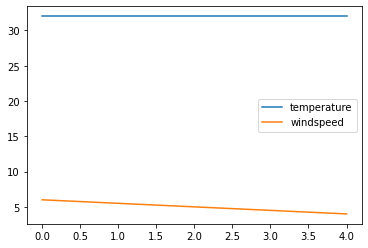

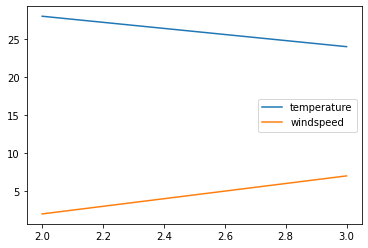

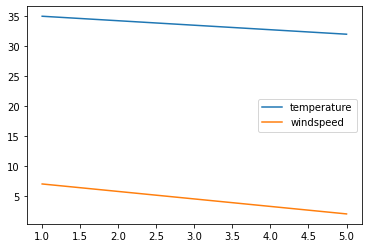

In [79]:
%matplotlib inline
g.plot()

### concating two dataframes

In [80]:
dict1={
     'day' : ['1/1/2017', '1/2/2017', '1/3/2017'],
    'temperature' : [32, 35, 28],
    'windspeed' : [6, 7, 2],
    'event' : ['Rain', 'Sunny', 'Snow']

}

df1 = pd.DataFrame(dict1)

dict2={
    'day' : ['1/4/2017', '1/5/2017', '1/6/2017'],
    'temperature' : [24, 32, 32],
    'windspeed' : [7, 4, 2],
    'event' : ['Snow', 'Rain', 'Sunny']
}

df2 = pd.DataFrame(dict2)

In [81]:
dff=pd.concat([df1,df2],ignore_index=True)
dff

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,32,2,Sunny


### Merging dataframes

In [86]:
dict1={
     'day' : ['1/1/2017', '1/2/2017', '1/3/2017','1/4/2017', '1/5/2017', '1/6/2017'],
    'temperature' : [32, 35, 28,24, 32, 32]
}

df1 = pd.DataFrame(dict1)

dict2={
    'temperature' : [24, 32, 32],
    'event' : ['Snow', 'Rain', 'Sunny']
}

df2 = pd.DataFrame(dict2)

In [88]:
df3 = pd.merge(df1,df2,on="temperature") # inner join
df3

,day,temperature,event
0,1/1/2017,32,Rain
1,1/1/2017,32,Sunny
2,1/5/2017,32,Rain
3,1/5/2017,32,Sunny
4,1/6/2017,32,Rain
5,1/6/2017,32,Sunny
6,1/4/2017,24,Snow


In [89]:
#df3 = pd.merge(df1,df2,on="temperature", how ="outer/left/right")

#### Pivot Table

In [2]:
dict1={
     'day' : ['1/1/2017', '1/2/2017', '1/3/2017', '1/4/2017', '1/5/2017', '1/6/2017'],
    'temperature' : [32, 35, 28, 24, 32, 32],
    'windspeed' : [6, 7, 2, 7, 4, 2],
    'event' : ['Rain', 'Sunny', 'Snow', 'Snow', 'Rain', 'Sunny']

}
df = pd.DataFrame(dict1)
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,32,2,Sunny


In [5]:
df.pivot_table(index="day",columns="event")

temperature             windspeed           
event           Rain  Snow Sunny      Rain Snow Sunny
day                                                  
1/1/2017        32.0   NaN   NaN       6.0  NaN   NaN
1/2/2017         NaN   NaN  35.0       NaN  NaN   7.0
1/3/2017         NaN  28.0   NaN       NaN  2.0   NaN
1/4/2017         NaN  24.0   NaN       NaN  7.0   NaN
1/5/2017        32.0   NaN   NaN       4.0  NaN   NaN
1/6/2017         NaN   NaN  32.0       NaN  NaN   2.0

In [8]:
df.pivot_table(index=pd.Grouper(freq='M', key='day'),columns='event')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'